In [3]:
import importlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from utils import data_manage_utils
from utils import train_utils

importlib.reload(train_utils)
importlib.reload(data_manage_utils)

<module 'utils.data_manage_utils' from 'C:\\Users\\chrig\\OneDrive - Johannes Kepler Universität Linz (1)\\Masterarbeit\\PythonWorkspace\\utils\\data_manage_utils.py'>

In [4]:
pert_result_path = "./pert_output/RF/2023_03_07-1832/"
data_path = "NEW"
pert_result_df_path = pert_result_path + "pert_out_df.pkl"
pert_result_model_path = pert_result_path + "model_path.txt"
with open(pert_result_model_path,'r') as file:
    model_path = file.read().rstrip()

pert_df = pd.read_pickle(pert_result_df_path)

pert_cols = list(set(pert_df.columns) - {"ARR_MIN_OF_DAY_COS", "ARR_MIN_OF_DAY_SIN", "ARR_DAY_SIN", "ARR_DAY_COS"})
USE_TH = False
if USE_TH:
    pert_cols = ["TEMP(C)","WIND_SPEED(KMH)","REL_HUMIDITY(PERCENT)","WIND_DRCT(DEG)", "SEA_LEVEL_PRESSURE(MILLIBAR)"]

pert_df

,ARR_MIN_OF_DAY_COS,WINGLETS(YN),CRS_ELAPSED_TIME(MINS),NR_PREV_ARR_FLIGHTS(1HR),MTOW(KG),TEMP(C),REL_HUMIDITY(PERCENT),WIND_DRCT(DEG),WIND_SPEED(KMH),SEA_LEVEL_PRESSURE(MILLIBAR),...,08R/26L,09L/27R,09R/27L,10/28,ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,y_true,pert_id,y
0,0.028190,1,162.0,17,78000.133912,17.777778,91.575,100.0,20.372,1007.3000,...,3.0,1.0,1.0,3.0,0.974928,-0.222521,-0.999603,2,TEMP(C)<7029487>,2
1,0.028190,1,162.0,17,78000.133912,17.767778,91.575,100.0,20.372,1007.3000,...,3.0,1.0,1.0,3.0,0.974928,-0.222521,-0.999603,2,TEMP(C)<7029487>,2
2,0.028190,1,162.0,17,78000.133912,17.787778,91.575,100.0,20.372,1007.3000,...,3.0,1.0,1.0,3.0,0.974928,-0.222521,-0.999603,2,TEMP(C)<7029487>,2
3,0.028190,1,162.0,17,78000.133912,17.757778,91.575,100.0,20.372,1007.3000,...,3.0,1.0,1.0,3.0,0.974928,-0.222521,-0.999603,2,TEMP(C)<7029487>,2
4,0.028190,1,162.0,17,78000.133912,17.797778,91.575,100.0,20.372,1007.3000,...,3.0,1.0,1.0,3.0,0.974928,-0.222521,-0.999603,2,TEMP(C)<7029487>,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12783478,-0.675095,0,71.0,58,53523.856000,22.777778,35.460,100.0,7.408,1020.3035,...,3.0,0.0,0.0,3.0,0.433884,-0.900969,-0.737731,0,SEA_LEVEL_PRESSURE(MILLIBAR)<9532146>,1
12783479,-0.675095,0,71.0,58,53523.856000,22.777778,35.460,100.0,7.408,1020.2960,...,3.0,0.0,0.0,3.0,0.433884,-0.900969,-0.737731,0,SEA_LEVEL_PRESSURE(MILLIBAR)<9532146>,1
12783480,-0.675095,0,71.0,58,53523.856000,22.777778,35.460,100.0,7.408,1020.3040,...,3.0,0.0,0.0,3.0,0.433884,-0.900969,-0.737731,0,SEA_LEVEL_PRESSURE(MILLIBAR)<9532146>,1
12783481,-0.675095,0,71.0,58,53523.856000,22.777778,35.460,100.0,7.408,1020.2955,...,3.0,0.0,0.0,3.0,0.433884,-0.900969,-0.737731,0,SEA_LEVEL_PRESSURE(MILLIBAR)<9532146>,1


In [5]:
y_test_pred = pd.read_pickle("./../training/training_results/" + model_path + "y_test_pred.pkl")
y_test_true = pd.read_pickle("./../training/processed_files/"+data_path+"/y_test_df.pkl")
y_test_pred

,y_pred_test_rf
0,2
1,1
2,1
3,1
4,0
...,...
69770,1
69771,2
69772,1
69773,0


In [6]:
X_test = pd.read_pickle("./../training/processed_files/"+data_path+"/X_test_df.pkl")
y_test = pd.read_pickle("./../training/processed_files/"+data_path+"/y_test_df.pkl")
X_test

,ARR_MIN_OF_DAY_COS,WINGLETS(YN),CRS_ELAPSED_TIME(MINS),NR_PREV_ARR_FLIGHTS(1HR),MTOW(KG),TEMP(C),REL_HUMIDITY(PERCENT),WIND_DRCT(DEG),WIND_SPEED(KMH),SEA_LEVEL_PRESSURE(MILLIBAR),...,EVENT_SN,EVENT_TS,08L/26R,08R/26L,09L/27R,09R/27L,10/28,ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN
7029487,0.028190,1,162.0,17,78000.133912,17.777778,91.575,100.0,20.372,1007.3,...,2,0,3.0,3.0,1.0,1.0,3.0,0.974928,-0.222521,-0.999603
9077072,-0.638665,1,172.0,95,21522.940400,22.500000,95.380,130.0,9.260,1020.7,...,0,0,3.0,3.0,3.0,3.0,2.0,0.433884,-0.900969,0.769485
10170283,0.845190,0,205.0,18,206384.360000,15.000000,57.660,100.0,11.112,1025.5,...,0,0,3.0,3.0,0.0,3.0,3.0,0.974928,-0.222521,-0.534466
6381898,-0.992709,0,95.0,46,79015.726400,16.111111,96.850,100.0,15.742,1011.8,...,0,0,1.0,1.0,3.0,1.0,3.0,0.974928,-0.222521,0.120537
6133283,0.544639,0,187.0,27,206384.360000,11.111111,82.680,250.0,9.260,1021.4,...,0,0,1.0,1.0,3.0,3.0,2.0,-0.781831,0.623490,-0.838671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7449434,-0.239316,0,440.0,59,122469.840000,21.111111,43.660,250.0,20.372,1012.6,...,0,0,2.0,3.0,2.0,1.0,2.0,0.000000,1.000000,-0.970942
7059980,0.266591,0,165.0,38,53523.856000,12.222222,48.650,310.0,44.448,1013.2,...,0,0,3.0,3.0,0.0,0.0,0.0,0.433884,-0.900969,-0.963810
10908360,-0.774605,0,130.0,71,206384.360000,5.000000,73.250,320.0,16.668,1020.0,...,0,0,1.0,1.0,1.0,3.0,3.0,0.974928,-0.222521,0.632445
10848688,-0.108533,0,183.0,58,206384.360000,21.111111,56.820,30.0,5.556,1019.2,...,0,0,0.0,3.0,0.0,3.0,3.0,-0.974928,-0.222521,-0.994093


[Text(0, 0, '11801'), Text(0, 0, '54694'), Text(0, 0, '3280')]

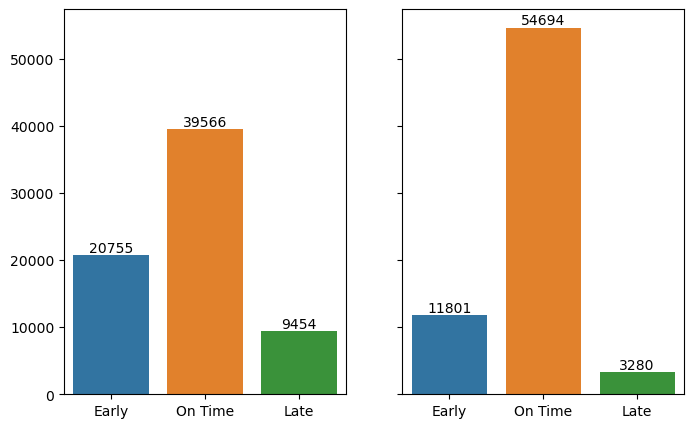

In [7]:
fig, axes = plt.subplots(1,2,figsize=(8,5), sharey=True)
sns.barplot(x=["Early", "On Time", "Late"], y=list(y_test_true.value_counts().sort_index()), ax=axes[0])
sns.barplot(x=["Early", "On Time", "Late"], y=list(y_test_pred.value_counts().sort_index()), ax=axes[1])
axes[0].bar_label(axes[0].containers[0])
axes[1].bar_label(axes[1].containers[0])

In [8]:
def print_measures(y_pred, y_true, true_labels):
    if type(y_pred) == pd.DataFrame:
        y_pred = y_pred[y_pred.columns[0]]
    if type(y_true) == pd.DataFrame:
        y_true = y_true[y_true.columns[0]]
    ret_dict = {}
    print(20*"-")
    print(f"Global measures")
    print(f"Number of entries: {len(y_pred)}")
    acc = accuracy_score(y_true=y_true, y_pred=y_pred, normalize=True)
    ret_dict.update({"acc" : acc})
    print(f"Accuracy: {acc:.5f}")
    print(f"Precision-µ: {precision_score(y_true=y_true, y_pred=y_pred, average='micro'):.5f}")
    print(f"Recall-µ: {recall_score(y_true=y_true, y_pred=y_pred, average='micro'):.5f}")
    print(f"F1-Score-µ: {f1_score(y_true=y_true, y_pred=y_pred, average='micro'):.5f}")
    print("=")
    print(f"Precision-M: {precision_score(y_true=y_true, y_pred=y_pred, average='macro'):.5f}")
    print(f"Recall-M: {recall_score(y_true=y_true, y_pred=y_pred, average='macro'):.5f}")
    print(f"F1-Score-M: {f1_score(y_true=y_true, y_pred=y_pred, average='macro'):.5f}")
    for label in true_labels:
        if (label in y_pred) or (label in y_true):
            y_pred_filtered = [1 if val == label else 0 for val in y_pred]
            y_true_filtered = [1 if val == label else 0 for val in y_true]
            print(20*"-")
            print(f"Measures for label '{label}'")
            print(f"Number of entries: {sum(y_true_filtered)}")
            prec = precision_score(y_true=y_true_filtered, y_pred=y_pred_filtered)
            print(f"Precision score: {prec:.5f}")
            print(f"Recall score: {recall_score(y_true=y_true_filtered, y_pred=y_pred_filtered):.5f}")
            ret_dict.update({"prec"+str(label) : prec})
    return ret_dict
real = print_measures(y_test_pred, y_test_true, [0,1,2])

--------------------
Global measures
Number of entries: 69775
Accuracy: 0.61184
Precision-µ: 0.61184
Recall-µ: 0.61184
F1-Score-µ: 0.61184
=
Precision-M: 0.60466
Recall-M: 0.46557
F1-Score-M: 0.48402
--------------------
Measures for label '0'
Number of entries: 20755
Precision score: 0.54851
Recall score: 0.31188
--------------------
Measures for label '1'
Number of entries: 39566
Precision score: 0.62371
Recall score: 0.86218
--------------------
Measures for label '2'
Number of entries: 9454
Precision score: 0.64177
Recall score: 0.22266


In [9]:
X_pert_res = pert_df.groupby("pert_id").agg({'y':['min','max']})["y"]
X_pert_res

,min,max
pert_id,,
08L/26R<10001167>,1,1
08L/26R<10002056>,1,1
08L/26R<10002240>,1,1
08L/26R<10002279>,1,1
08L/26R<10002862>,1,1
...,...,...
WINGLETS(YN)<9998545>,1,1
WINGLETS(YN)<9998560>,1,1
WINGLETS(YN)<9998781>,1,1


In [10]:
pert_alerts = X_pert_res[~(X_pert_res["min"] == X_pert_res["max"])]
pert_alerts

,min,max
pert_id,,
08L/26R<10017197>,1,2
08L/26R<10028685>,1,2
08L/26R<10029263>,1,2
08L/26R<10032507>,1,2
08L/26R<10032747>,1,2
...,...,...
WINGLETS(YN)<9954124>,0,1
WINGLETS(YN)<9957457>,0,1
WINGLETS(YN)<9961803>,0,1


In [11]:
list(pert_alerts.index)
pert_df[pert_df["pert_id"].isin(list(pert_alerts.index))]

,ARR_MIN_OF_DAY_COS,WINGLETS(YN),CRS_ELAPSED_TIME(MINS),NR_PREV_ARR_FLIGHTS(1HR),MTOW(KG),TEMP(C),REL_HUMIDITY(PERCENT),WIND_DRCT(DEG),WIND_SPEED(KMH),SEA_LEVEL_PRESSURE(MILLIBAR),...,08R/26L,09L/27R,09R/27L,10/28,ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,y_true,pert_id,y
9044,-0.132523,0,92.0,80,53523.856,21.111111,68.09,70.0,20.372,1009.8000,...,1.0,3.0,1.0,3.0,0.974928,-0.222521,-0.991180,0,TEMP(C)<6377231>,1
9045,-0.132523,0,92.0,80,53523.856,21.101111,68.09,70.0,20.372,1009.8000,...,1.0,3.0,1.0,3.0,0.974928,-0.222521,-0.991180,0,TEMP(C)<6377231>,1
9046,-0.132523,0,92.0,80,53523.856,21.121111,68.09,70.0,20.372,1009.8000,...,1.0,3.0,1.0,3.0,0.974928,-0.222521,-0.991180,0,TEMP(C)<6377231>,1
9047,-0.132523,0,92.0,80,53523.856,21.091111,68.09,70.0,20.372,1009.8000,...,1.0,3.0,1.0,3.0,0.974928,-0.222521,-0.991180,0,TEMP(C)<6377231>,1
9048,-0.132523,0,92.0,80,53523.856,21.131111,68.09,70.0,20.372,1009.8000,...,1.0,3.0,1.0,3.0,0.974928,-0.222521,-0.991180,0,TEMP(C)<6377231>,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12563211,-0.834256,0,100.0,56,206384.360,14.388889,100.00,110.0,16.668,999.9035,...,2.0,1.0,2.0,2.0,-0.781831,0.623490,-0.551377,2,SEA_LEVEL_PRESSURE(MILLIBAR)<5924959>,1
12563212,-0.834256,0,100.0,56,206384.360,14.388889,100.00,110.0,16.668,999.8960,...,2.0,1.0,2.0,2.0,-0.781831,0.623490,-0.551377,2,SEA_LEVEL_PRESSURE(MILLIBAR)<5924959>,2
12563213,-0.834256,0,100.0,56,206384.360,14.388889,100.00,110.0,16.668,999.9040,...,2.0,1.0,2.0,2.0,-0.781831,0.623490,-0.551377,2,SEA_LEVEL_PRESSURE(MILLIBAR)<5924959>,1
12563214,-0.834256,0,100.0,56,206384.360,14.388889,100.00,110.0,16.668,999.8955,...,2.0,1.0,2.0,2.0,-0.781831,0.623490,-0.551377,2,SEA_LEVEL_PRESSURE(MILLIBAR)<5924959>,2


In [12]:
pert_outcomes = pert_df[pert_df.columns[-3:]]
pert_outcomes

,y_true,pert_id,y
0,2,TEMP(C)<7029487>,2
1,2,TEMP(C)<7029487>,2
2,2,TEMP(C)<7029487>,2
3,2,TEMP(C)<7029487>,2
4,2,TEMP(C)<7029487>,2
...,...,...,...
12783478,0,SEA_LEVEL_PRESSURE(MILLIBAR)<9532146>,1
12783479,0,SEA_LEVEL_PRESSURE(MILLIBAR)<9532146>,1
12783480,0,SEA_LEVEL_PRESSURE(MILLIBAR)<9532146>,1
12783481,0,SEA_LEVEL_PRESSURE(MILLIBAR)<9532146>,1


In [13]:
def disassemble_pert_id(row):
    s = row["pert_id"].split("<")
    col = s[0]
    idx = s[1][:-1]
    val = row[col]
    return [col,val,idx]

col_values = pert_df.apply(lambda row: disassemble_pert_id(row), axis=1)

In [14]:
col_values = pd.DataFrame(list(col_values.to_numpy()), columns=["column","val","idx"])
col_values

,column,val,idx
0,TEMP(C),17.777778,7029487
1,TEMP(C),17.767778,7029487
2,TEMP(C),17.787778,7029487
3,TEMP(C),17.757778,7029487
4,TEMP(C),17.797778,7029487
...,...,...,...
12783478,SEA_LEVEL_PRESSURE(MILLIBAR),1020.303500,9532146
12783479,SEA_LEVEL_PRESSURE(MILLIBAR),1020.296000,9532146
12783480,SEA_LEVEL_PRESSURE(MILLIBAR),1020.304000,9532146
12783481,SEA_LEVEL_PRESSURE(MILLIBAR),1020.295500,9532146


In [15]:
pert_outcomes["column"] = list(col_values["column"])
pert_outcomes["val"] = list(col_values["val"])
pert_outcomes["idx"] = list(col_values["idx"])
pert_outcomes

C:\Users\chrig\AppData\Local\Temp\ipykernel_21056\1567013798.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pert_outcomes["column"] = list(col_values["column"])
C:\Users\chrig\AppData\Local\Temp\ipykernel_21056\1567013798.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pert_outcomes["val"] = list(col_values["val"])
C:\Users\chrig\AppData\Local\Temp\ipykernel_21056\1567013798.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

,y_true,pert_id,y,column,val,idx
0,2,TEMP(C)<7029487>,2,TEMP(C),17.777778,7029487
1,2,TEMP(C)<7029487>,2,TEMP(C),17.767778,7029487
2,2,TEMP(C)<7029487>,2,TEMP(C),17.787778,7029487
3,2,TEMP(C)<7029487>,2,TEMP(C),17.757778,7029487
4,2,TEMP(C)<7029487>,2,TEMP(C),17.797778,7029487
...,...,...,...,...,...,...
12783478,0,SEA_LEVEL_PRESSURE(MILLIBAR)<9532146>,1,SEA_LEVEL_PRESSURE(MILLIBAR),1020.303500,9532146
12783479,0,SEA_LEVEL_PRESSURE(MILLIBAR)<9532146>,1,SEA_LEVEL_PRESSURE(MILLIBAR),1020.296000,9532146
12783480,0,SEA_LEVEL_PRESSURE(MILLIBAR)<9532146>,1,SEA_LEVEL_PRESSURE(MILLIBAR),1020.304000,9532146
12783481,0,SEA_LEVEL_PRESSURE(MILLIBAR)<9532146>,1,SEA_LEVEL_PRESSURE(MILLIBAR),1020.295500,9532146


In [16]:
pert_view = pert_outcomes.groupby(["pert_id","y_true"]).first().reset_index().set_index('pert_id')
pert_view

,y_true,y,column,val,idx
pert_id,,,,,
08L/26R<10001167>,2,1,08L/26R,3.0,10001167
08L/26R<10002056>,1,1,08L/26R,3.0,10002056
08L/26R<10002240>,0,1,08L/26R,3.0,10002240
08L/26R<10002279>,1,1,08L/26R,1.0,10002279
08L/26R<10002862>,1,1,08L/26R,1.0,10002862
...,...,...,...,...,...
WINGLETS(YN)<9998545>,2,1,WINGLETS(YN),1.0,9998545
WINGLETS(YN)<9998560>,1,1,WINGLETS(YN),1.0,9998560
WINGLETS(YN)<9998781>,0,1,WINGLETS(YN),1.0,9998781


In [17]:
if USE_TH:
    pert_view = pert_view[list(pert_view["column"].isin(pert_cols))]

In [18]:
pert_view["pert_alarm"] = [idx in pert_alerts.index for idx in pert_view.index]
faulty = pert_view[pert_view["y_true"] != pert_view["y"]]
faulty_and_changed = faulty[faulty["pert_alarm"]]
pert_view["class_error"] = [idx in faulty.index for idx in pert_view.index]
pert_view

,y_true,y,column,val,idx,pert_alarm,class_error
pert_id,,,,,,,
08L/26R<10001167>,2,1,08L/26R,3.0,10001167,False,True
08L/26R<10002056>,1,1,08L/26R,3.0,10002056,False,False
08L/26R<10002240>,0,1,08L/26R,3.0,10002240,False,True
08L/26R<10002279>,1,1,08L/26R,1.0,10002279,False,False
08L/26R<10002862>,1,1,08L/26R,1.0,10002862,False,False
...,...,...,...,...,...,...,...
WINGLETS(YN)<9998545>,2,1,WINGLETS(YN),1.0,9998545,False,True
WINGLETS(YN)<9998560>,1,1,WINGLETS(YN),1.0,9998560,False,False
WINGLETS(YN)<9998781>,0,1,WINGLETS(YN),1.0,9998781,False,True


In [19]:
print(f"Wrong classification records for all perturbation options: {(len(pert_view[pert_view['class_error']])/len(pert_view))*100:.3f}%")
print(f"# of perturbation alarms for all perturbation options: {(len(pert_view[pert_view['pert_alarm']])/len(pert_view))*100:.3f}%")
print(f"Alarmed perturbation options that were wrongly classified: {(len(pert_view[pert_view['pert_alarm'] & pert_view['class_error']])/len(pert_view[pert_view['pert_alarm']]))*100:.3f}%")
print(f"Percentage of wrong classifications that were alarmed: {(len(pert_view[pert_view['pert_alarm'] & pert_view['class_error']])/len(pert_view[pert_view['class_error']]))*100:.3f}%")
print(f"Percentage of correct classifications that were alarmed: {(len(pert_view[pert_view['pert_alarm'] & pert_view['class_error']])/len(pert_view[pert_view['class_error'] == False]))*100:.3f}%")
print(f"Percentage of not alarmed options that were wrongly classified: {(len(pert_view[pert_view['class_error']])/len(pert_view[pert_view['pert_alarm'] == False]))*100:.3f}%")

Wrong classification records for all perturbation options: 38.878%
# of perturbation alarms for all perturbation options: 2.917%
Alarmed perturbation options that were wrongly classified: 53.173%
Percentage of wrong classifications that were alarmed: 3.989%
Percentage of correct classifications that were alarmed: 2.537%
Percentage of not alarmed options that were wrongly classified: 40.046%


In [20]:
cols = list(pert_view["column"].value_counts().index)
cols

['08L/26R',
 '08R/26L',
 'WIND_SPEED(KMH)',
 'WIND_DRCT(DEG)',
 'VISIBILITY(MILES)',
 'TEMP(C)',
 'SEA_LEVEL_PRESSURE(MILLIBAR)',
 'REL_HUMIDITY(PERCENT)',
 'NR_PREV_ARR_FLIGHTS(1HR)',
 'MTOW(KG)',
 'EVENT_TS',
 'EVENT_SN',
 'EVENT_RA',
 'EVENT_IC',
 'EVENT_FG',
 'EVENT_DZ',
 'EVENT_BR',
 'CRS_ELAPSED_TIME(MINS)',
 '10/28',
 '09R/27L',
 '09L/27R',
 'WINGLETS(YN)']

C:\Users\chrig\anaconda3\envs\ma-env39\lib\site-packages\seaborn\distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves
C:\Users\chrig\anaconda3\envs\ma-env39\lib\site-packages\seaborn\distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves
C:\Users\chrig\anaconda3\envs\ma-env39\lib\site-packages\seaborn\distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new ar

,y_true,y,column,val,pert_alarm,class_error
idx,,,,,,
10001167,2,1,08L/26R,3.0,False,True
10002056,1,1,08L/26R,3.0,False,False
10002240,0,1,08L/26R,3.0,False,True
10002279,1,1,08L/26R,1.0,False,False
10002862,1,1,08L/26R,1.0,False,False
...,...,...,...,...,...,...
9998545,2,1,08L/26R,3.0,False,True
9998560,1,1,08L/26R,1.0,False,False
9998781,0,1,08L/26R,3.0,False,True


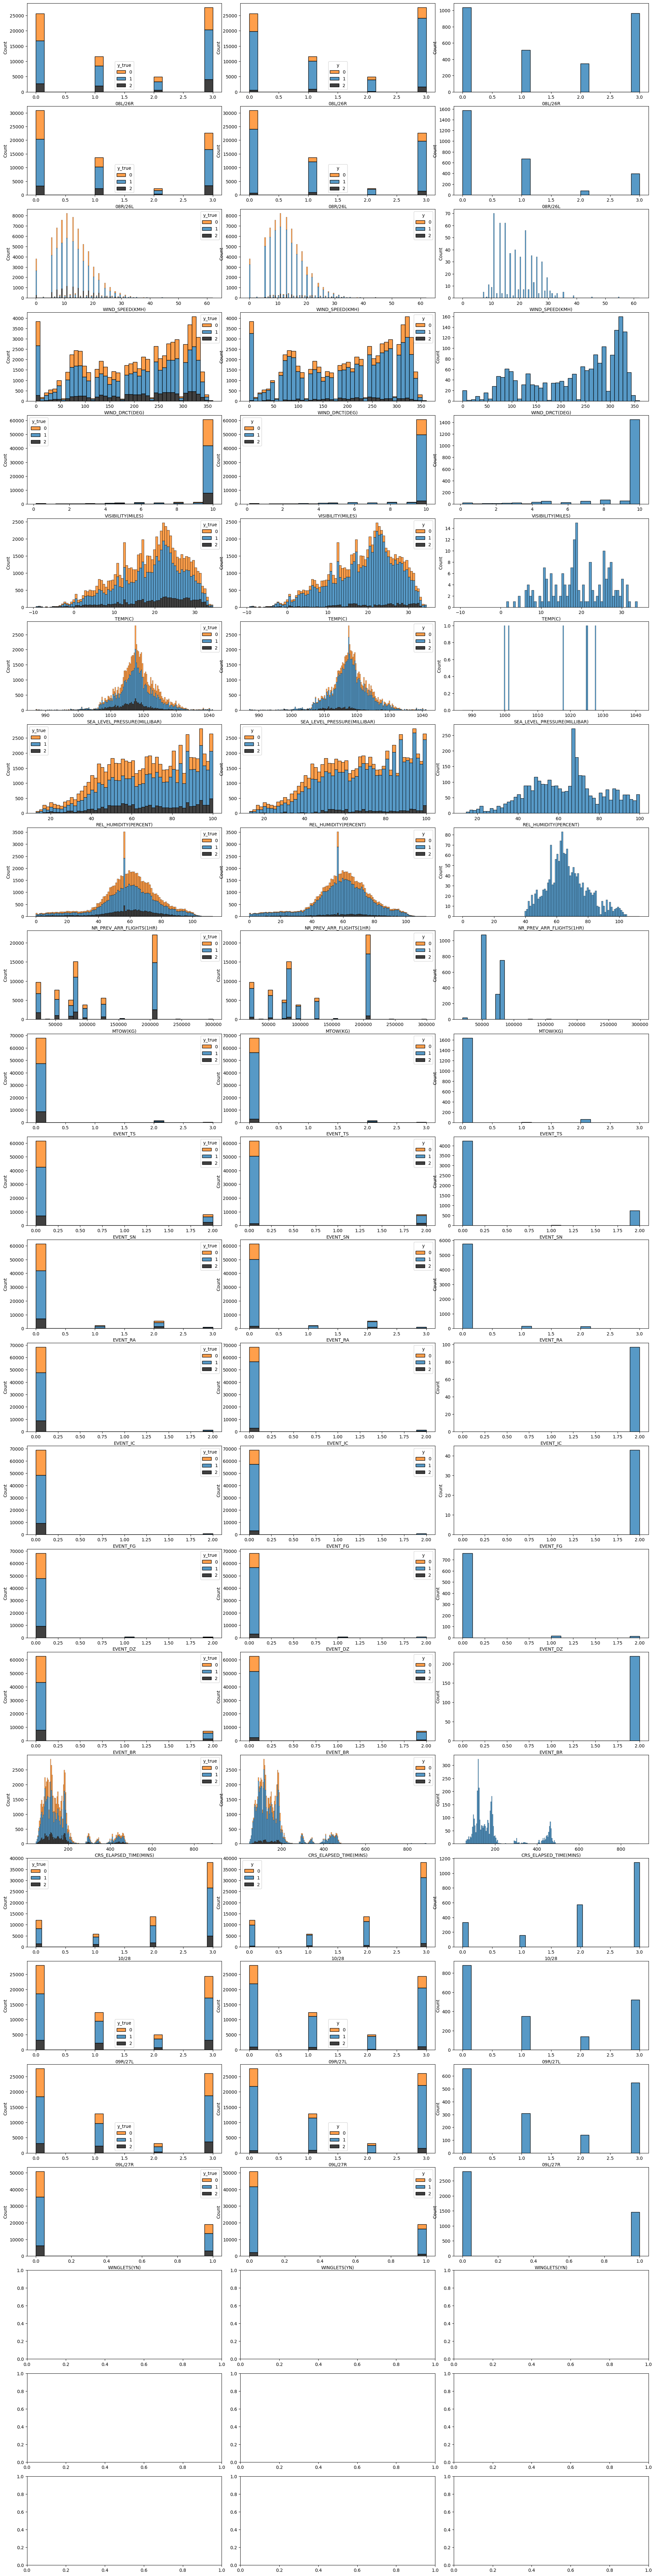

In [21]:
pert_view_alert = pert_view[pert_view["pert_alarm"] == True]

fig, axes = plt.subplots(len(pert_cols),3, figsize=(20,80))
fig.tight_layout()
count = 0
for col in cols:
    p_row = int(count / 3)
    bins = np.histogram_bin_edges(pert_view[pert_view["column"] == col]["val"], bins='auto')
    ax = sns.histplot(data = pert_view[pert_view["column"] == col], x = "val", hue="y_true", multiple="stack", ax=axes[p_row][0], bins=bins, palette = ["C1", "C0", "k"])
    ax.set(xlabel=col)
    ax = sns.histplot(data = pert_view[pert_view["column"] == col], x = "val", hue="y", multiple="stack", ax=axes[p_row][1], bins=bins, palette = ["C1", "C0", "k"])
    ax.set(xlabel=col)
    ax = sns.histplot(data = pert_view_alert[pert_view_alert["column"] == col], x = "val", multiple="stack", ax=axes[p_row][2], bins = bins)
    ax.set(xlabel=col)
    count += 3

pert_view.groupby("idx").first()

In [22]:
def to_set(x):

    return set(x)

pert_view["y_outcomes"] = list(pert_outcomes[["pert_id" , "y"]].groupby("pert_id")["y"].apply(set).reset_index()["y"].to_numpy())
pert_view

,y_true,y,column,val,idx,pert_alarm,class_error,y_outcomes
pert_id,,,,,,,,
08L/26R<10001167>,2,1,08L/26R,3.0,10001167,False,True,{1}
08L/26R<10002056>,1,1,08L/26R,3.0,10002056,False,False,{1}
08L/26R<10002240>,0,1,08L/26R,3.0,10002240,False,True,{1}
08L/26R<10002279>,1,1,08L/26R,1.0,10002279,False,False,{1}
08L/26R<10002862>,1,1,08L/26R,1.0,10002862,False,False,{1}
...,...,...,...,...,...,...,...,...
WINGLETS(YN)<9998545>,2,1,WINGLETS(YN),1.0,9998545,False,True,{1}
WINGLETS(YN)<9998560>,1,1,WINGLETS(YN),1.0,9998560,False,False,{1}
WINGLETS(YN)<9998781>,0,1,WINGLETS(YN),1.0,9998781,False,True,{1}


In [23]:
def find_diff(x):
    return list(x.y_outcomes.difference({x.y}))

pert_view["changed_to"] = pert_view.apply( find_diff , axis = "columns")

In [24]:
def is_good_change(x):
    return x.y_true in x.changed_to

pert_view["corrected"] = list(pert_view[["y_true", "changed_to"]].apply(is_good_change, axis = "columns"))

In [25]:
def is_bad_change(x):
    if not x.class_error and x.changed_to:
        return True
    return False

pert_view["worsened"] = list(pert_view[["class_error", "changed_to"]].apply(is_bad_change, axis = "columns"))

In [26]:
pert_view

,y_true,y,column,val,idx,pert_alarm,class_error,y_outcomes,changed_to,corrected,worsened
pert_id,,,,,,,,,,,
08L/26R<10001167>,2,1,08L/26R,3.0,10001167,False,True,{1},[],False,False
08L/26R<10002056>,1,1,08L/26R,3.0,10002056,False,False,{1},[],False,False
08L/26R<10002240>,0,1,08L/26R,3.0,10002240,False,True,{1},[],False,False
08L/26R<10002279>,1,1,08L/26R,1.0,10002279,False,False,{1},[],False,False
08L/26R<10002862>,1,1,08L/26R,1.0,10002862,False,False,{1},[],False,False
...,...,...,...,...,...,...,...,...,...,...,...
WINGLETS(YN)<9998545>,2,1,WINGLETS(YN),1.0,9998545,False,True,{1},[],False,False
WINGLETS(YN)<9998560>,1,1,WINGLETS(YN),1.0,9998560,False,False,{1},[],False,False
WINGLETS(YN)<9998781>,0,1,WINGLETS(YN),1.0,9998781,False,True,{1},[],False,False


In [27]:
def get_first(x):
    return x[0]

def find_union(x):
    return set().union(*x)

def get_indicator(x):
    return sum(x) / len(pert_cols)

pert_test_results = pert_view.groupby("idx").agg({"y_true" : get_first, "y" : pd.Series.mode, "pert_alarm" : max, "y_outcomes" : find_union, "changed_to" : find_union, "corrected" : get_indicator , "worsened" : get_indicator})
pert_test_results

,y_true,y,pert_alarm,y_outcomes,changed_to,corrected,worsened
idx,,,,,,,
10001167,2,1,False,{1},{},0.0,0.00
10002056,1,1,False,{1},{},0.0,0.00
10002240,0,1,False,{1},{},0.0,0.00
10002279,1,1,False,{1},{},0.0,0.00
10002862,1,1,True,"{1, 2}",{2},0.0,0.12
...,...,...,...,...,...,...,...
9998545,2,1,False,{1},{},0.0,0.00
9998560,1,1,False,{1},{},0.0,0.00
9998781,0,1,False,{1},{},0.0,0.00


In [28]:
pert_test_results[pert_test_results["pert_alarm"]]

,y_true,y,pert_alarm,y_outcomes,changed_to,corrected,worsened
idx,,,,,,,
10002862,1,1,True,"{1, 2}",{2},0.00,0.12
10008413,1,1,True,"{1, 2}",{2},0.00,0.04
10008723,1,1,True,"{1, 2}",{2},0.00,0.04
10008981,1,1,True,"{1, 2}",{2},0.00,0.04
10014210,1,1,True,"{1, 2}",{2},0.00,0.04
...,...,...,...,...,...,...,...
9968426,0,1,True,"{0, 1}",{0},0.04,0.00
9969931,1,1,True,"{0, 1}",{0},0.00,0.04
9980116,0,0,True,"{0, 1}",{1},0.00,0.56


In [29]:
pert_test_results[pert_test_results["pert_alarm"] == False]

,y_true,y,pert_alarm,y_outcomes,changed_to,corrected,worsened
idx,,,,,,,
10001167,2,1,False,{1},{},0.0,0.0
10002056,1,1,False,{1},{},0.0,0.0
10002240,0,1,False,{1},{},0.0,0.0
10002279,1,1,False,{1},{},0.0,0.0
10002873,1,1,False,{1},{},0.0,0.0
...,...,...,...,...,...,...,...
9998545,2,1,False,{1},{},0.0,0.0
9998560,1,1,False,{1},{},0.0,0.0
9998781,0,1,False,{1},{},0.0,0.0


In [30]:
alarm = print_measures(list(pert_test_results[pert_test_results["pert_alarm"] == True]["y"]), list(pert_test_results[pert_test_results["pert_alarm"] == True]["y_true"]), [0,1,2])

--------------------
Global measures
Number of entries: 12079
Accuracy: 0.49673
Precision-µ: 0.49673
Recall-µ: 0.49673
F1-Score-µ: 0.49673
=
Precision-M: 0.49327
Recall-M: 0.46535
F1-Score-M: 0.46927
--------------------
Measures for label '0'
Number of entries: 5019
Precision score: 0.50580
Recall score: 0.66906
--------------------
Measures for label '1'
Number of entries: 5291
Precision score: 0.48454
Recall score: 0.38499
--------------------
Measures for label '2'
Number of entries: 1769
Precision score: 0.48948
Recall score: 0.34200


In [31]:
no_alarm = print_measures(list(pert_test_results[pert_test_results["pert_alarm"] == False]["y"]), list(pert_test_results[pert_test_results["pert_alarm"] == False]["y_true"]), [0,1,2])

--------------------
Global measures
Number of entries: 57696
Accuracy: 0.63519
Precision-µ: 0.63519
Recall-µ: 0.63519
F1-Score-µ: 0.63519
=
Precision-M: 0.65688
Recall-M: 0.44120
F1-Score-M: 0.45185
--------------------
Measures for label '0'
Number of entries: 15736
Precision score: 0.60381
Recall score: 0.19554
--------------------
Measures for label '1'
Number of entries: 34275
Precision score: 0.63449
Recall score: 0.93651
--------------------
Measures for label '2'
Number of entries: 7685
Precision score: 0.73234
Recall score: 0.19154


In [32]:
pert_test_results[pert_test_results["corrected"] > 0.25]

,y_true,y,pert_alarm,y_outcomes,changed_to,corrected,worsened
idx,,,,,,,
10032747,1,2,True,"{1, 2}",{1},0.56,0.0
10074770,1,0,True,"{0, 1}",{1},0.48,0.0
10076479,1,0,True,"{0, 1}",{1},0.44,0.0
10089669,1,2,True,"{1, 2}",{1},0.48,0.0
10139102,1,0,True,"{0, 1}",{1},0.40,0.0
...,...,...,...,...,...,...,...
9860444,1,0,True,"{0, 1}",{1},0.32,0.0
9916750,1,0,True,"{0, 1}",{1},0.36,0.0
9926885,1,0,True,"{0, 1}",{1},0.32,0.0


In [33]:
pert_test_results[pert_test_results["worsened"] > 0]

,y_true,y,pert_alarm,y_outcomes,changed_to,corrected,worsened
idx,,,,,,,
10002862,1,1,True,"{1, 2}",{2},0.0,0.12
10008413,1,1,True,"{1, 2}",{2},0.0,0.04
10008723,1,1,True,"{1, 2}",{2},0.0,0.04
10008981,1,1,True,"{1, 2}",{2},0.0,0.04
10014210,1,1,True,"{1, 2}",{2},0.0,0.04
...,...,...,...,...,...,...,...
9957457,0,0,True,"{0, 1}",{1},0.0,0.08
9969931,1,1,True,"{0, 1}",{0},0.0,0.04
9980116,0,0,True,"{0, 1}",{1},0.0,0.56


[(0.0, 0.25)]

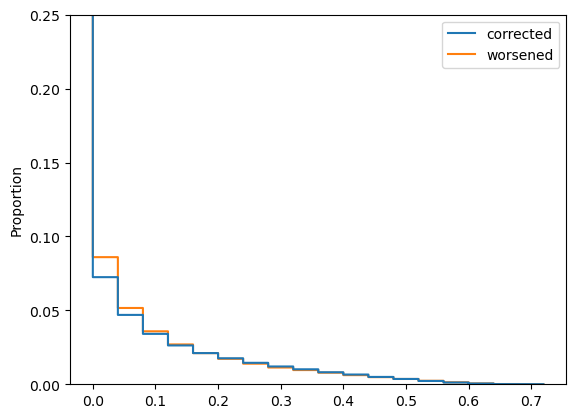

In [34]:
ax = sns.ecdfplot(data=pert_test_results[["corrected", "worsened"]], complementary=True)
ax.set(ylim=(0,0.25))

In [35]:
pert_test_results[pert_test_results["y_outcomes"].map(len) > 2]

,y_true,y,pert_alarm,y_outcomes,changed_to,corrected,worsened
idx,,,,,,,
10459530,0,0,True,"{0, 1, 2}","{1, 2}",0.00,0.08
10966156,0,0,True,"{0, 1, 2}","{1, 2}",0.00,0.24
11044281,2,2,True,"{0, 1, 2}","{0, 1}",0.00,0.64
11044478,0,2,True,"{0, 1, 2}","{0, 1}",0.08,0.00
11044605,2,0,True,"{0, 1, 2}","{1, 2}",0.20,0.00
...,...,...,...,...,...,...,...
9157322,0,0,True,"{0, 1, 2}","{1, 2}",0.00,0.60
9222207,2,0,True,"{0, 1, 2}","{1, 2}",0.08,0.00
9222219,1,0,True,"{0, 1, 2}","{1, 2}",0.16,0.00


In [36]:
pert_test_results["correct"] = pert_test_results["y_true"] == pert_test_results["y"]
pert_test_results

,y_true,y,pert_alarm,y_outcomes,changed_to,corrected,worsened,correct
idx,,,,,,,,
10001167,2,1,False,{1},{},0.0,0.00,False
10002056,1,1,False,{1},{},0.0,0.00,True
10002240,0,1,False,{1},{},0.0,0.00,False
10002279,1,1,False,{1},{},0.0,0.00,True
10002862,1,1,True,"{1, 2}",{2},0.0,0.12,True
...,...,...,...,...,...,...,...,...
9998545,2,1,False,{1},{},0.0,0.00,False
9998560,1,1,False,{1},{},0.0,0.00,True
9998781,0,1,False,{1},{},0.0,0.00,False


<AxesSubplot:xlabel='pert_alarm', ylabel='count'>

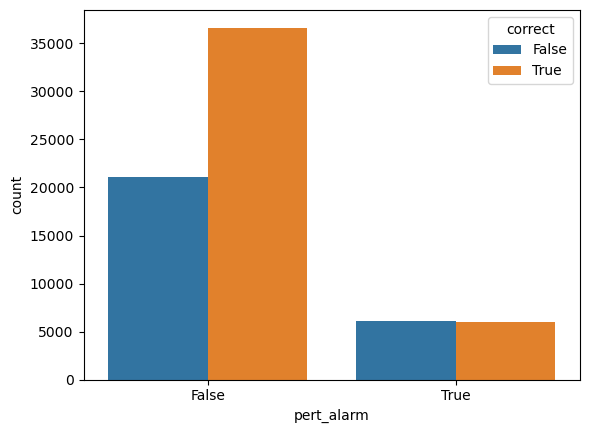

In [37]:
sns.countplot(data = pert_test_results, x="pert_alarm", hue="correct")

In [38]:
def correct_mistakes(row):
    if row.pert_alarm:
        return row.y_true
    else:
        return row.y

def force_mistakes(row):
    if row.worsened >= 0.3 and row.changed_to:
        return random.sample(row.changed_to,1)[0]
    else:
        return row.y

def force_corrections(row):
    if row.corrected >= 0.3:
        return row.y_true
    else:
        return row.y

pert_test_results["y_corrected"] = pert_test_results.apply(correct_mistakes, axis="columns")
pert_test_results["y_forced_mistake"] = pert_test_results.apply(force_mistakes, axis="columns")
pert_test_results["y_forced_correction"] = pert_test_results.apply(force_corrections, axis="columns")

C:\Users\chrig\AppData\Local\Temp\ipykernel_21056\462870279.py:9: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  return random.sample(row.changed_to,1)[0]


In [39]:
pert_test_results

,y_true,y,pert_alarm,y_outcomes,changed_to,corrected,worsened,correct,y_corrected,y_forced_mistake,y_forced_correction
idx,,,,,,,,,,,
10001167,2,1,False,{1},{},0.0,0.00,False,1,1,1
10002056,1,1,False,{1},{},0.0,0.00,True,1,1,1
10002240,0,1,False,{1},{},0.0,0.00,False,1,1,1
10002279,1,1,False,{1},{},0.0,0.00,True,1,1,1
10002862,1,1,True,"{1, 2}",{2},0.0,0.12,True,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
9998545,2,1,False,{1},{},0.0,0.00,False,1,1,1
9998560,1,1,False,{1},{},0.0,0.00,True,1,1,1
9998781,0,1,False,{1},{},0.0,0.00,False,1,1,1


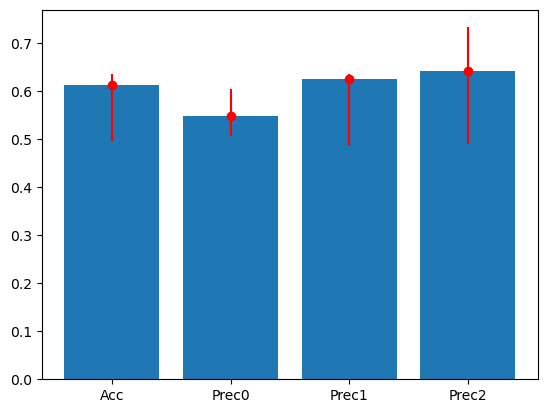

In [40]:
y_errormin = [alarm.get("acc"), alarm.get("prec0"), alarm.get("prec1"), alarm.get("prec2")]
y_errormax = [no_alarm.get("acc"), no_alarm.get("prec0"), no_alarm.get("prec1"), no_alarm.get("prec2")]
y_error = [y_errormin, y_errormax]
y = [real.get("acc"), real.get("prec0"), real.get("prec1"), real.get("prec2")]
for c, v in enumerate(y_errormin):
    y_errormin[c] = y[c] - v
for c, v in enumerate(y_errormax):
    y_errormax[c] = v - y[c]
x = ["Acc", "Prec0", "Prec1", "Prec2"]
plt.bar(x,y)
plt.errorbar(x,y, yerr=y_error, fmt='o', color="r")
plt.show()

In [41]:
print(f"Real values {real}")
print(f"Alarmed values {alarm}")
print(f"Non-alarmed values {no_alarm}")

Real values {'acc': 0.6118380508778216, 'prec0': 0.5485128378950936, 'prec1': 0.6237064394631953, 'prec2': 0.6417682926829268}
Alarmed values {'acc': 0.4967298617435218, 'prec0': 0.5057990661244163, 'prec1': 0.4845385347288297, 'prec2': 0.4894822006472492}
Non-alarmed values {'acc': 0.6351913477537438, 'prec0': 0.603806907378336, 'prec1': 0.6344929828029254, 'prec2': 0.7323383084577114}


In [42]:
# Scores when all alerted entries are corrected
print_measures(list(pert_test_results["y_corrected"]), list(pert_test_results["y_true"]), [0,1,2])

--------------------
Global measures
Number of entries: 69775
Accuracy: 0.69834
Precision-µ: 0.69834
Recall-µ: 0.69834
F1-Score-µ: 0.69834
=
Precision-M: 0.77571
Recall-M: 0.55930
F1-Score-M: 0.59928
--------------------
Measures for label '0'
Number of entries: 20755
Precision score: 0.80040
Recall score: 0.39007
--------------------
Measures for label '1'
Number of entries: 39566
Precision score: 0.66910
Recall score: 0.94500
--------------------
Measures for label '2'
Number of entries: 9454
Precision score: 0.85763
Recall score: 0.34282


{'acc': 0.6983446793264063,
 'prec0': 0.8003954522985665,
 'prec1': 0.6691004097993951,
 'prec2': 0.8576342947869807}

In [43]:
# Scores when all alerted entries discarded
print_measures(list(pert_test_results[pert_test_results["pert_alarm"] == False]["y"]), list(pert_test_results[pert_test_results["pert_alarm"] == False]["y_true"]), [0,1,2])

--------------------
Global measures
Number of entries: 57696
Accuracy: 0.63519
Precision-µ: 0.63519
Recall-µ: 0.63519
F1-Score-µ: 0.63519
=
Precision-M: 0.65688
Recall-M: 0.44120
F1-Score-M: 0.45185
--------------------
Measures for label '0'
Number of entries: 15736
Precision score: 0.60381
Recall score: 0.19554
--------------------
Measures for label '1'
Number of entries: 34275
Precision score: 0.63449
Recall score: 0.93651
--------------------
Measures for label '2'
Number of entries: 7685
Precision score: 0.73234
Recall score: 0.19154


{'acc': 0.6351913477537438,
 'prec0': 0.603806907378336,
 'prec1': 0.6344929828029254,
 'prec2': 0.7323383084577114}

In [44]:
#Scores when all strongly changed perturbations are corrected
print_measures(list(pert_test_results["y_forced_correction"]), list(pert_test_results["y_true"]), [0,1,2])

--------------------
Global measures
Number of entries: 69775
Accuracy: 0.62326
Precision-µ: 0.62326
Recall-µ: 0.62326
F1-Score-µ: 0.62326
=
Precision-M: 0.62689
Recall-M: 0.47201
F1-Score-M: 0.49119
--------------------
Measures for label '0'
Number of entries: 20755
Precision score: 0.58201
Recall score: 0.31183
--------------------
Measures for label '1'
Number of entries: 39566
Precision score: 0.62890
Recall score: 0.88260
--------------------
Measures for label '2'
Number of entries: 9454
Precision score: 0.66976
Recall score: 0.22160


{'acc': 0.6232604801146543,
 'prec0': 0.5820143884892086,
 'prec1': 0.628901255245196,
 'prec2': 0.6697570332480819}

In [45]:
#Scores when all strongly changed perturbations are changed to wrong entries
print_measures(list(pert_test_results["y_forced_mistake"]), list(pert_test_results["y_true"]), [0,1,2])

--------------------
Global measures
Number of entries: 69775
Accuracy: 0.59989
Precision-µ: 0.59989
Recall-µ: 0.59989
F1-Score-µ: 0.59989
=
Precision-M: 0.58680
Recall-M: 0.44974
F1-Score-M: 0.46443
--------------------
Measures for label '0'
Number of entries: 20755
Precision score: 0.52041
Recall score: 0.27882
--------------------
Measures for label '1'
Number of entries: 39566
Precision score: 0.61435
Recall score: 0.86180
--------------------
Measures for label '2'
Number of entries: 9454
Precision score: 0.62563
Recall score: 0.20859


{'acc': 0.5998853457542099,
 'prec0': 0.5204136690647482,
 'prec1': 0.6143451705313226,
 'prec2': 0.6256345177664975}